<a href='#load'>1. Loading data</a>

<a href='#gw-constant'>2. Estimating genomewide constant population size</a>

<a href='#gw-constant-rep'>3. Estimating genomewide constant population size  for each replicate</a>

<a href='#gw-constant-chr'>4. Estimating genomewide constant population size for each chromosome</a>

<a href='#gw-constant-chr-rep'>5. Estimating genomewide constant population size for each chromosome and replicate</a>

<a href='#gw-constant-time'>6. Estimating genomewide constant population size in time</a>

<a href='#gw-constant-chr-rep-time'>7. Estimating genomewide constant population size for each chromosome and replicate in time</a>


<a id='load'></a>
## 1. Loading data

In [96]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import sys,os
path='/'.join(os.getcwd().split('/')[:-2])

sys.path.insert(1,path)
import Utils.Util as utl
import Libs.Markov as mkv
import pandas as pd
pd.options.display.max_rows = 20;
pd.options.display.expand_frame_repr = True
from IPython.display import display
import seaborn as sns
print 'Loading data...'
CD=pd.read_pickle(path+'/data/pandas/dmel.df')
ylab='log(Likelihood)'
rangeN=range(50,401,100)
CD

Loading data...


REP 
 0 
 ... 
 1 
 2 
 
 
 
 GEN 
 0 
 15 
 27 
 37 
 59 
 ... 
 59 
 0 
 23 
 37 
 59 
 
 
 
 READ 
 C 
 D 
 C 
 D 
 C 
 D 
 C 
 D 
 C 
 D 
 ... 
 C 
 D 
 C 
 D 
 C 
 D 
 C 
 D 
 C 
 D 
 
 
 CHROM 
 POS 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2L 
 94961 
 5.0 
 56.0 
 7.0 
 64.0 
 2.0 
 77.0 
 5.0 
 53.0 
 0.0 
 93.0 
 ... 
 0.0 
 84.0 
 4.0 
 96.0 
 7.0 
 58.0 
 2.0 
 51.0 
 3.0 
 79.0 
 
 
 97355 
 3.0 
 60.0 
 7.0 
 52.0 
 0.0 
 63.0 
 0.0 
 43.0 
 0.0 
 83.0 
 ... 
 1.0 
 109.0 
 0.0 
 94.0 
 0.0 
 79.0 
 0.0 
 36.0 
 0.0 
 118.0 
 
 
 147462 
 5.0 
 102.0 
 1.0 
 89.0 
 1.0 
 73.0 
 1.0 
 43.0 
 0.0 
 117.0 
 ... 
 3.0 
 97.0 
 2.0 
 99.0 
 0.0 
 82.0 
 2.0 
 56.0 
 0.0 
 82.0 
 
 
 149384 
 4.0 
 74.0 
 10.0 
 85.0 
 12.0 
 90.0 
 4.0 
 57.0 
 4.0 
 78.0 
 ... 
 6.0 
 93.0 
 3.0 
 120.0 
 1.0 
 88.0 
 0.0 
 46.0 
 0.0 
 82.0 
 
 
 154952 
 6.0 
 71.0 
 8.0 
 65.0 
 2.0 
 54.0 
 2.0 
 22.0 
 0.0 
 77.0 
 ... 
 0.0 
 86.0 
 5.0 
 53.0 
 0.0 
 60.0 
 1.0 
 30.0 
 1.0 
 82.0 
 
 
 162262 
 3.0 
 56.0 
 1.0 
 45.0 
 0.0 
 83.0 
 1.0 
 65.0 
 5.0 
 100.0 
 ... 
 0.0 
 114.0 
 4.0 
 99.0 
 1.0 
 50.0 
 0.0 
 44.0 
 0.0 
 87.0 
 
 
 171719 
 36.0 
 80.0 
 22.0 
 59.0 
 14.0 
 64.0 
 14.0 
 53.0 
 9.0 
 74.0 
 ... 
 19.0 
 107.0 
 45.0 
 102.0 
 18.0 
 51.0 
 8.0 
 39.0 
 21.0 
 72.0 
 
 
 232253 
 6.0 
 68.0 
 12.0 
 51.0 
 2.0 
 80.0 
 1.0 
 57.0 
 0.0 
 92.0 
 ... 
 3.0 
 78.0 
 15.0 
 92.0 
 2.0 
 76.0 
 0.0 
 33.0 
 3.0 
 77.0 
 
 
 263485 
 36.0 
 81.0 
 14.0 
 46.0 
 30.0 
 60.0 
 18.0 
 35.0 
 37.0 
 95.0 
 ... 
 30.0 
 91.0 
 27.0 
 76.0 
 11.0 
 41.0 
 15.0 
 37.0 
 17.0 
 71.0 
 
 
 284108 
 3.0 
 54.0 
 10.0 
 36.0 
 4.0 
 51.0 
 1.0 
 35.0 
 17.0 
 86.0 
 ... 
 4.0 
 115.0 
 10.0 
 66.0 
 2.0 
 38.0 
 0.0 
 22.0 
 0.0 
 103.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 X 
 22266903 
 19.0 
 29.0 
 27.0 
 38.0 
 45.0 
 61.0 
 25.0 
 35.0 
 82.0 
 92.0 
 ... 
 82.0 
 103.0 
 42.0 
 58.0 
 25.0 
 44.0 
 25.0 
 35.0 
 52.0 
 79.0 
 
 
 22269810 
 15.0 
 35.0 
 16.0 
 24.0 
 11.0 
 47.0 
 3.0 
 30.0 
 22.0 
 124.0 
 ... 
 5.0 
 63.0 
 14.0 
 74.0 
 8.0 
 34.0 
 5.0 
 34.0 
 13.0 
 60.0 
 
 
 22274431 
 1.0 
 53.0 
 0.0 
 51.0 
 5.0 
 91.0 
 2.0 
 68.0 
 11.0 
 115.0 
 ... 
 1.0 
 118.0 
 1.0 
 109.0 
 3.0 
 48.0 
 3.0 
 46.0 
 2.0 
 102.0 
 
 
 22285951 
 8.0 
 69.0 
 7.0 
 71.0 
 5.0 
 88.0 
 3.0 
 54.0 
 16.0 
 116.0 
 ... 
 5.0 
 110.0 
 14.0 
 126.0 
 6.0 
 93.0 
 4.0 
 56.0 
 7.0 
 91.0 
 
 
 22315577 
 29.0 
 56.0 
 21.0 
 54.0 
 40.0 
 92.0 
 24.0 
 44.0 
 51.0 
 85.0 
 ... 
 53.0 
 87.0 
 54.0 
 87.0 
 28.0 
 50.0 
 19.0 
 37.0 
 32.0 
 79.0 
 
 
 22322421 
 2.0 
 34.0 
 0.0 
 39.0 
 4.0 
 90.0 
 2.0 
 54.0 
 9.0 
 89.0 
 ... 
 9.0 
 105.0 
 4.0 
 97.0 
 7.0 
 32.0 
 12.0 
 62.0 
 9.0 
 101.0 
 
 
 22334646 
 22.0 
 52.0 
 26.0 
 45.0 
 30.0 
 54.0 
 15.0 
 25.0 
 27.0 
 69.0 
 ... 
 26.0 
 51.0 
 27.0 
 54.0 
 16.0 
 35.0 
 10.0 
 24.0 
 15.0 
 42.0 
 
 
 22369227 
 30.0 
 37.0 
 28.0 
 46.0 
 51.0 
 77.0 
 21.0 
 35.0 
 70.0 
 96.0 
 ... 
 54.0 
 93.0 
 55.0 
 76.0 
 25.0 
 36.0 
 36.0 
 47.0 
 35.0 
 84.0 
 
 
 22369434 
 2.0 
 30.0 
 1.0 
 44.0 
 3.0 
 45.0 
 0.0 
 36.0 
 0.0 
 91.0 
 ... 
 2.0 
 107.0 
 4.0 
 69.0 
 2.0 
 36.0 
 1.0 
 39.0 
 0.0 
 70.0 
 
 
 22385304 
 2.0 
 30.0 
 11.0 
 36.0 
 13.0 
 72.0 
 15.0 
 50.0 
 18.0 
 115.0 
 ... 
 4.0 
 107.0 
 18.0 
 111.0 
 7.0 
 27.0 
 19.0 
 57.0 
 23.0 
 85.0 
 
 
 
 15000 rows × 26 columns

<a id='gw-constant'></a>
## 2. Estimating genomewide constant population size


Computing genomewide constant population size...

Estimating N for 
Performing grid search on N= [50, 150, 250, 350]


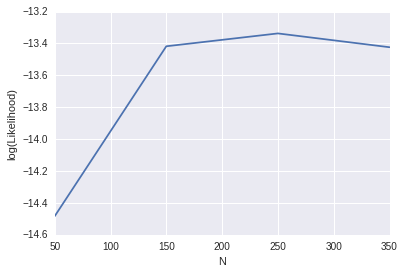

In [97]:
print 'Computing genomewide constant population size...'
likes=mkv.estimateN(CD,rangeN=rangeN)
likes.plot();plt.ylabel(ylab);plt.show()

<a id='gw-constant-rep'></a>
## 3. Estimating genomewide constant population size for each replicate

Computing genomewide constant population size for each replicate...

Estimating N for Replicate 0 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Replicate 1 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Replicate 2 
Performing grid search on N= [50, 150, 250, 350]


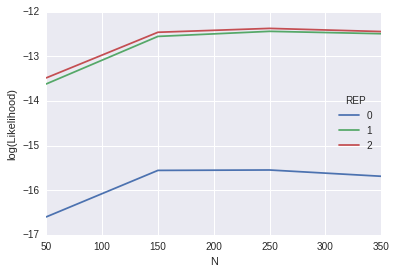

likelihoods


REP,0,1,2
N,,,
50,-16.598174,-13.619841,-13.483830
150,-15.557213,-12.555726,-12.462879
250,-15.548188,-12.442247,-12.376157
350,-15.688586,-12.495226,-12.446837


Maximum likelihood for each replicate


,REP,N
0,0,250
1,1,250
2,2,250


In [98]:
print 'Computing genomewide constant population size for each replicate...'
likes=mkv.estimateN(CD,rangeN=rangeN,Nr=True)
likes.plot();plt.ylabel(ylab);plt.show()
print 'likelihoods'
display(likes)
print 'Maximum likelihood for each replicate'
likes.idxmax().rename('N').reset_index()

<a id='gw-constant-chr'></a>
## 4. Estimating genomewide constant population size for each chromosome

Computing constant population size for each chromosome...

Estimating N for Chromosome 2L 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2R 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 3L 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 3R 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome X 
Performing grid search on N= [50, 150, 250, 350]


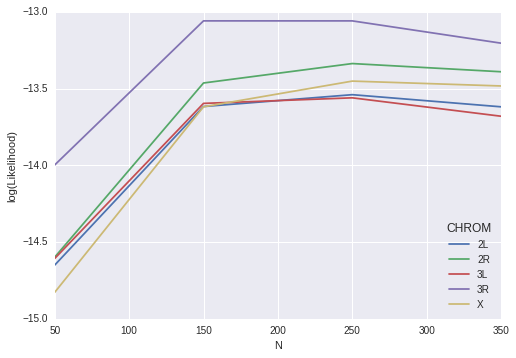

likelihoods:


N,50,150,250,350
CHROM,,,,
2L,-14.650048,-13.616710,-13.539481,-13.618577
2R,-14.598523,-13.463290,-13.336647,-13.390089
3L,-14.607086,-13.596271,-13.559949,-13.679952
3R,-13.997540,-13.058488,-13.058593,-13.203847
X,-14.827583,-13.618424,-13.450991,-13.482678


Maximum likelihood for each chromosome


,CHROM,N
0,2L,250
1,2R,250
2,3L,250
3,3R,150
4,X,250


In [24]:
print 'Computing constant population size for each chromosome...'
likes=mkv.estimateN(CD,rangeN=rangeN,Nc=True)
print 'likelihoods:'
display(likes)
likes.T.plot();plt.ylabel(ylab);plt.show()
print 'Maximum likelihood for each chromosome'
likes.idxmax(1).plot.bar()
likes.idxmax(1).rename('N').reset_index()

<a id='gw-constant-chr-rep'></a>
## 5. Estimating genomewide constant population size for each chromosome and replicate

Computing constant population size for each chromosome and replicate...

Estimating N for Chromosome 2L Replicate 0 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 1 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 2 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2R Replicate 0 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2R Replicate 1 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2R Replicate 2 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 3L Replicate 0 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 3L Replicate 1 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 3L Replicate 2 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 3R Replicate 0 
Performing grid search on N= [50, 150

REP 
 0 
 1 
 2 
 
 
 CHROM 
 N 
 
 
 
 
 
 
 
 2L 
 50 
 -16.768751 
 -13.693569 
 -13.693806 
 
 
 150 
 -15.787030 
 -12.529664 
 -12.766327 
 
 
 250 
 -15.802608 
 -12.360967 
 -12.718755 
 
 
 350 
 -15.955306 
 -12.378517 
 -12.806059 
 
 
 2R 
 50 
 -16.899774 
 -13.476113 
 -13.702321 
 
 
 150 
 -15.697288 
 -12.301573 
 -12.581328 
 
 
 250 
 -15.613780 
 -12.127192 
 -12.436988 
 
 
 350 
 -15.719827 
 -12.141677 
 -12.466759 
 
 
 3L 
 50 
 -16.561865 
 -13.620134 
 -13.786840 
 
 
 150 
 -15.652678 
 -12.606817 
 -12.642469 
 
 
 250 
 -15.721758 
 -12.547867 
 -12.516685 
 
 
 350 
 -15.911768 
 -12.647176 
 -12.578546 
 
 
 3R 
 50 
 -16.210089 
 -13.360519 
 -13.062340 
 
 
 150 
 -15.254031 
 -12.396337 
 -12.228691 
 
 
 250 
 -15.323995 
 -12.349800 
 -12.269480 
 
 
 350 
 -15.536102 
 -12.458219 
 -12.435833 
 
 
 X 
 50 
 -16.967635 
 -13.714638 
 -13.851218 
 
 
 150 
 -15.710231 
 -12.550882 
 -12.681853 
 
 
 250 
 -15.576906 
 -12.370370 
 -12.493710 
 
 
 350 
 -15.646080 
 -12.379718 
 -12.497800

Maximum likelihood for each chromosome


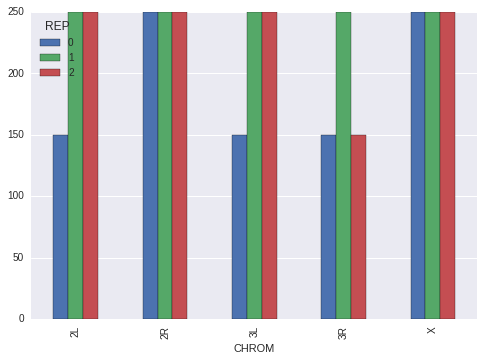

In [60]:
print 'Computing constant population size for each chromosome and replicate...'
likes=mkv.estimateN(CD,rangeN=rangeN,Nc=True,Nr=True)
print 'likelihoods:'
display(likes)
print 'Maximum likelihood for each chromosome'
ML=likes.stack('REP').groupby(level=[0,2]).idxmax().apply(lambda x: x[1]).unstack('REP')
ML.plot.bar();

<a id='gw-constant-time'></a>
## 6. Estimating genomewide constant population size in time

Computing population size in time...
All the replicate should be sampled synchronously
Synchonized data, i.e., all the replicates have samples at generations [0,15,37,59]:


REP 
 0 
 1 
 2 
 
 
 
 GEN 
 0 
 15 
 37 
 59 
 0 
 ... 
 59 
 0 
 15 
 37 
 59 
 
 
 
 READ 
 C 
 D 
 C 
 D 
 C 
 D 
 C 
 D 
 C 
 D 
 ... 
 C 
 D 
 C 
 D 
 C 
 D 
 C 
 D 
 C 
 D 
 
 
 CHROM 
 POS 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2L 
 94961 
 5.0 
 56.0 
 7.0 
 64.0 
 5.0 
 53.0 
 0.0 
 93.0 
 0.0 
 45.0 
 ... 
 0.0 
 84.0 
 4.0 
 96.0 
 7.0 
 58.0 
 2.0 
 51.0 
 3.0 
 79.0 
 
 
 97355 
 3.0 
 60.0 
 7.0 
 52.0 
 0.0 
 43.0 
 0.0 
 83.0 
 1.0 
 40.0 
 ... 
 1.0 
 109.0 
 0.0 
 94.0 
 0.0 
 79.0 
 0.0 
 36.0 
 0.0 
 118.0 
 
 
 147462 
 5.0 
 102.0 
 1.0 
 89.0 
 1.0 
 43.0 
 0.0 
 117.0 
 0.0 
 52.0 
 ... 
 3.0 
 97.0 
 2.0 
 99.0 
 0.0 
 82.0 
 2.0 
 56.0 
 0.0 
 82.0 
 
 
 149384 
 4.0 
 74.0 
 10.0 
 85.0 
 4.0 
 57.0 
 4.0 
 78.0 
 1.0 
 40.0 
 ... 
 6.0 
 93.0 
 3.0 
 120.0 
 1.0 
 88.0 
 0.0 
 46.0 
 0.0 
 82.0 
 
 
 154952 
 6.0 
 71.0 
 8.0 
 65.0 
 2.0 
 22.0 
 0.0 
 77.0 
 1.0 
 26.0 
 ... 
 0.0 
 86.0 
 5.0 
 53.0 
 0.0 
 60.0 
 1.0 
 30.0 
 1.0 
 82.0 
 
 
 162262 
 3.0 
 56.0 
 1.0 
 45.0 
 1.0 
 65.0 
 5.0 
 100.0 
 2.0 
 52.0 
 ... 
 0.0 
 114.0 
 4.0 
 99.0 
 1.0 
 50.0 
 0.0 
 44.0 
 0.0 
 87.0 
 
 
 171719 
 36.0 
 80.0 
 22.0 
 59.0 
 14.0 
 53.0 
 9.0 
 74.0 
 21.0 
 47.0 
 ... 
 19.0 
 107.0 
 45.0 
 102.0 
 18.0 
 51.0 
 8.0 
 39.0 
 21.0 
 72.0 
 
 
 232253 
 6.0 
 68.0 
 12.0 
 51.0 
 1.0 
 57.0 
 0.0 
 92.0 
 4.0 
 36.0 
 ... 
 3.0 
 78.0 
 15.0 
 92.0 
 2.0 
 76.0 
 0.0 
 33.0 
 3.0 
 77.0 
 
 
 263485 
 36.0 
 81.0 
 14.0 
 46.0 
 18.0 
 35.0 
 37.0 
 95.0 
 16.0 
 31.0 
 ... 
 30.0 
 91.0 
 27.0 
 76.0 
 11.0 
 41.0 
 15.0 
 37.0 
 17.0 
 71.0 
 
 
 284108 
 3.0 
 54.0 
 10.0 
 36.0 
 1.0 
 35.0 
 17.0 
 86.0 
 2.0 
 31.0 
 ... 
 4.0 
 115.0 
 10.0 
 66.0 
 2.0 
 38.0 
 0.0 
 22.0 
 0.0 
 103.0 
 
 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 ... 
 
 
 X 
 22266903 
 19.0 
 29.0 
 27.0 
 38.0 
 25.0 
 35.0 
 82.0 
 92.0 
 18.0 
 32.0 
 ... 
 82.0 
 103.0 
 42.0 
 58.0 
 25.0 
 44.0 
 25.0 
 35.0 
 52.0 
 79.0 
 
 
 22269810 
 15.0 
 35.0 
 16.0 
 24.0 
 3.0 
 30.0 
 22.0 
 124.0 
 10.0 
 36.0 
 ... 
 5.0 
 63.0 
 14.0 
 74.0 
 8.0 
 34.0 
 5.0 
 34.0 
 13.0 
 60.0 
 
 
 22274431 
 1.0 
 53.0 
 0.0 
 51.0 
 2.0 
 68.0 
 11.0 
 115.0 
 2.0 
 45.0 
 ... 
 1.0 
 118.0 
 1.0 
 109.0 
 3.0 
 48.0 
 3.0 
 46.0 
 2.0 
 102.0 
 
 
 22285951 
 8.0 
 69.0 
 7.0 
 71.0 
 3.0 
 54.0 
 16.0 
 116.0 
 2.0 
 44.0 
 ... 
 5.0 
 110.0 
 14.0 
 126.0 
 6.0 
 93.0 
 4.0 
 56.0 
 7.0 
 91.0 
 
 
 22315577 
 29.0 
 56.0 
 21.0 
 54.0 
 24.0 
 44.0 
 51.0 
 85.0 
 25.0 
 41.0 
 ... 
 53.0 
 87.0 
 54.0 
 87.0 
 28.0 
 50.0 
 19.0 
 37.0 
 32.0 
 79.0 
 
 
 22322421 
 2.0 
 34.0 
 0.0 
 39.0 
 2.0 
 54.0 
 9.0 
 89.0 
 4.0 
 57.0 
 ... 
 9.0 
 105.0 
 4.0 
 97.0 
 7.0 
 32.0 
 12.0 
 62.0 
 9.0 
 101.0 
 
 
 22334646 
 22.0 
 52.0 
 26.0 
 45.0 
 15.0 
 25.0 
 27.0 
 69.0 
 7.0 
 25.0 
 ... 
 26.0 
 51.0 
 27.0 
 54.0 
 16.0 
 35.0 
 10.0 
 24.0 
 15.0 
 42.0 
 
 
 22369227 
 30.0 
 37.0 
 28.0 
 46.0 
 21.0 
 35.0 
 70.0 
 96.0 
 32.0 
 43.0 
 ... 
 54.0 
 93.0 
 55.0 
 76.0 
 25.0 
 36.0 
 36.0 
 47.0 
 35.0 
 84.0 
 
 
 22369434 
 2.0 
 30.0 
 1.0 
 44.0 
 0.0 
 36.0 
 0.0 
 91.0 
 3.0 
 36.0 
 ... 
 2.0 
 107.0 
 4.0 
 69.0 
 2.0 
 36.0 
 1.0 
 39.0 
 0.0 
 70.0 
 
 
 22385304 
 2.0 
 30.0 
 11.0 
 36.0 
 15.0 
 50.0 
 18.0 
 115.0 
 6.0 
 44.0 
 ... 
 4.0 
 107.0 
 18.0 
 111.0 
 7.0 
 27.0 
 19.0 
 57.0 
 23.0 
 85.0 
 
 
 
 15000 rows × 24 columns


Estimating N for Between F0-F15 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Between F15-F37 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Between F37-F59 
Performing grid search on N= [50, 150, 250, 350]
likelihoods:


,15,37,59
N,,,
50,-7.067339,-6.724712,-7.203177
150,-6.853736,-6.473421,-6.889106
250,-6.859729,-6.467470,-6.873019
350,-6.885840,-6.487798,-6.891753


Maximum likelihood for each chromosome


,Generation,N
0,0,250
1,15,150
2,37,250
3,59,250


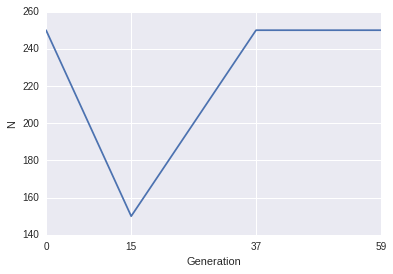

In [99]:
print 'Computing population size in time...'
print 'All the replicate should be sampled synchronously'
CDsync=CD.loc[:,pd.IndexSlice[:,[0,15,23,37,59]]]
cols=pd.DataFrame(CDsync.columns.tolist());cols[1]=cols[1].replace(23,15)
CDsync.columns=pd.MultiIndex.from_tuples(cols.values.tolist(),names=CD.columns.names)
print 'Synchonized data, i.e., all the replicates have samples at generations [0,15,37,59]:'
display(CDsync)
likes=mkv.estimateN(CDsync,rangeN=rangeN,Nt=True)
print 'likelihoods:'
display(likes)
print 'Maximum likelihood for each chromosome'
ML=likes.idxmax();ML.loc[0]=250;ML=ML.sort_index().rename('N');ML.index.name='Generation'
ML.plot(xticks=ML.index);plt.ylabel('N')
ML.reset_index()

<a id='gw-constant-chr-rep-time'></a>
## 7. Estimating genomewide constant population size for each chromosome and replicate in time


Estimating N for Chromosome 2L Replicate 0 Between F0-F15 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 0 Between F15-F27 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 0 Between F27-F37 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 0 Between F37-F59 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 1 Between F0-F15 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 1 Between F15-F37 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 1 Between F37-F59 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 2 Between F0-F23 
Performing grid search on N= [50, 150, 250, 350]

Estimating N for Chromosome 2L Replicate 2 Between F23-F37 
Performing grid search on N= [50, 150, 250, 350]

Estimating N

REP 
 0 
 1 
 2 
 
 
 
 
 15 
 27 
 37 
 59 
 15 
 37 
 59 
 23 
 37 
 59 
 
 
 CHROM 
 N 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 2L 
 50 
 -7.157606 
 -7.368222 
 -6.814471 
 -7.548357 
 -6.936768 
 -6.934487 
 -7.623852 
 -7.543474 
 -6.502118 
 -7.315163 
 
 
 150 
 -6.930464 
 -7.272360 
 -6.674393 
 -7.202794 
 -6.612718 
 -6.652216 
 -7.220633 
 -7.151599 
 -6.368457 
 -6.976411 
 
 
 250 
 -6.934319 
 -7.335460 
 -6.674926 
 -7.183574 
 -6.563458 
 -6.636501 
 -7.174463 
 -7.105075 
 -6.380049 
 -6.953006 
 
 
 350 
 -6.961876 
 -7.397485 
 -6.686113 
 -7.211845 
 -6.558648 
 -6.652237 
 -7.191040 
 -7.115768 
 -6.398270 
 -6.974191 
 
 
 2R 
 50 
 -7.211199 
 -7.293076 
 -6.762211 
 -7.498678 
 -6.893520 
 -6.847199 
 -7.460722 
 -7.496790 
 -6.529188 
 -7.291716 
 
 
 150 
 -6.964602 
 -7.109969 
 -6.596576 
 -7.158940 
 -6.581262 
 -6.556356 
 -7.096502 
 -7.114983 
 -6.306888 
 -6.959953 
 
 
 250 
 -6.957935 
 -7.125998 
 -6.589282 
 -7.140046 
 -6.541033 
 -6.529948 
 -7.058160 
 -7.075307 
 -6.284297 
 -6.940820 
 
 
 350 
 -6.978990 
 -7.159842 
 -6.598006 
 -7.165541 
 -6.543052 
 -6.536663 
 -7.069197 
 -7.087680 
 -6.286769 
 -6.963817 
 
 
 3L 
 50 
 -7.123547 
 -7.291314 
 -6.759870 
 -7.501677 
 -6.967255 
 -7.011379 
 -7.477852 
 -7.502834 
 -6.480922 
 -7.328091 
 
 
 150 
 -6.898732 
 -7.121774 
 -6.777961 
 -7.135032 
 -6.701358 
 -6.716569 
 -7.170277 
 -7.124279 
 -6.261345 
 -6.962857 
 
 
 250 
 -6.900853 
 -7.140107 
 -6.838418 
 -7.103600 
 -6.679828 
 -6.698884 
 -7.181802 
 -7.085322 
 -6.240049 
 -6.936864 
 
 
 350 
 -6.924990 
 -7.173024 
 -6.879468 
 -7.123418 
 -6.690214 
 -6.716803 
 -7.228933 
 -7.098574 
 -6.242404 
 -6.959865 
 
 
 3R 
 50 
 -7.086241 
 -7.187157 
 -6.646409 
 -7.478393 
 -6.850591 
 -6.676808 
 -7.549073 
 -7.386959 
 -6.362890 
 -7.336493 
 
 
 150 
 -6.995611 
 -7.071398 
 -6.491572 
 -7.099610 
 -6.678073 
 -6.447742 
 -7.202418 
 -7.175929 
 -6.226356 
 -6.957575 
 
 
 250 
 -7.065322 
 -7.116334 
 -6.480761 
 -7.061984 
 -6.705327 
 -6.447595 
 -7.182033 
 -7.230164 
 -6.233769 
 -6.912774 
 
 
 350 
 -7.128370 
 -7.166080 
 -6.483612 
 -7.079904 
 -6.744596 
 -6.466262 
 -7.212597 
 -7.300559 
 -6.249183 
 -6.926893 
 
 
 X 
 50 
 -7.035052 
 -7.265970 
 -6.764861 
 -7.503864 
 -6.862208 
 -6.965164 
 -7.513014 
 -7.443405 
 -6.481405 
 -7.324787 
 
 
 150 
 -6.832265 
 -7.138639 
 -6.583052 
 -7.119024 
 -6.572386 
 -6.651365 
 -7.145824 
 -7.060663 
 -6.244884 
 -6.943488 
 
 
 250 
 -6.838869 
 -7.179857 
 -6.565024 
 -7.076991 
 -6.537237 
 -6.620600 
 -7.108950 
 -7.016944 
 -6.214760 
 -6.894177 
 
 
 350 
 -6.863860 
 -7.228544 
 -6.566786 
 -7.089944 
 -6.540708 
 -6.629546 
 -7.122712 
 -7.029396 
 -6.214074 
 -6.900471

Print ML estimates:


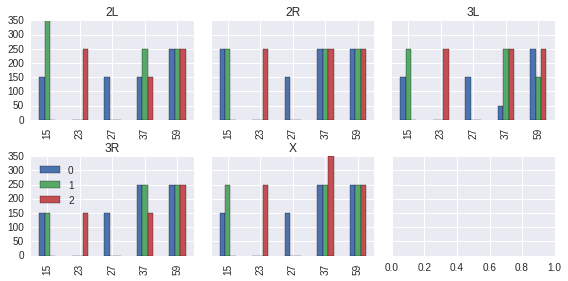

In [138]:
likes=mkv.estimateN(CD,Nt=True,Nc=True,Nr=True,rangeN=rangeN)
print 'Likelihoods:'
display(likes)
print 'Print ML estimates:'
fig,axes=plt.subplots(2,3,sharey=True,figsize=(8,4));
axes=axes.reshape(-1)
f=lambda x: x.loc[x.name]
for i,(ch,g) in enumerate(likes.groupby(level=0)):
     g.loc[ch].idxmax().unstack('REP').plot.bar(ax=axes[i],title=ch,legend=False)
axes[3].legend(loc='best')
plt.gcf().tight_layout(h_pad=0.5)